0) chargement des données : 

In [1]:
from pyspark.sql import SparkSession


import pandas as pd
import pyspark.sql as sparksql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "1g").\
        getOrCreate()

22/11/17 10:20:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


1) Lire la données : 


1.1) Lecture de la donnée :

In [2]:
path  = 'hdfs://namenode:9000/ma_base/pollution/'
dataframe_pollution = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_pollution.show()

+------------+-----+----+--------------------+------+--------------------+
|Id_pollution|Annee|Mois|             Qualite|Nombre|Niveau de pollution |
+------------+-----+----+--------------------+------+--------------------+
|           1| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           2| 2019|aout|Extremement mauvaise|  60.0|                   5|
|           3| 2019|aout|Extremement mauvaise|   1.0|                   5|
|           4| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           5| 2019|aout|Extremement mauvaise|  22.0|                   5|
|           6| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           7| 2019|aout|Extremement mauvaise|  13.0|                   5|
|           8| 2019|aout|Extremement mauvaise|  14.0|                   5|
|           9| 2019|aout|Extremement mauvaise|   0.0|                   5|
|          10| 2019|aout|Extremement mauvaise|  60.0|                   5|
|          11| 2019|aout|

197316

In [4]:
dataframe_pollution.schema

StructType(List(StructField(Id_pollution,StringType,true),StructField(Annee,StringType,true),StructField(Mois,StringType,true),StructField(Qualite,StringType,true),StructField(Nombre,StringType,true),StructField(Niveau de pollution ,StringType,true)))

In [5]:
#dataframe_pollution = dataframe_pollution.withColumnRenamed("Id_circulation","Id_pollution")

In [6]:
dataframe_pollution.show()

+------------+-----+----+--------------------+------+--------------------+
|Id_pollution|Annee|Mois|             Qualite|Nombre|Niveau de pollution |
+------------+-----+----+--------------------+------+--------------------+
|           1| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           2| 2019|aout|Extremement mauvaise|  60.0|                   5|
|           3| 2019|aout|Extremement mauvaise|   1.0|                   5|
|           4| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           5| 2019|aout|Extremement mauvaise|  22.0|                   5|
|           6| 2019|aout|Extremement mauvaise|   0.0|                   5|
|           7| 2019|aout|Extremement mauvaise|  13.0|                   5|
|           8| 2019|aout|Extremement mauvaise|  14.0|                   5|
|           9| 2019|aout|Extremement mauvaise|   0.0|                   5|
|          10| 2019|aout|Extremement mauvaise|  60.0|                   5|
|          11| 2019|aout|

In [249]:
dataframe_pollution.count()

197316

In [248]:

dataframe_pollution.describe(["Nombre"]).show()

+-------+------------------+
|summary|            Nombre|
+-------+------------------+
|  count|            197268|
|   mean|15.173334245797594|
| stddev|24.633260316635027|
|    min|               0.0|
|    max|              78.0|
+-------+------------------+



In [247]:
dataframe_pollution.agg({'Niveau de pollution ': 'mean'}).collect()

[Row(avg(Niveau de pollution )=2.9311900561672446)]

In [8]:
dataframe_pollution.select(["Annee","Mois","Qualite"]).show()

+-----+----+--------------------+
|Annee|Mois|             Qualite|
+-----+----+--------------------+
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
| 2019|aout|Extremement mauvaise|
+-----+----+--------------------+
only showing top 20 rows



In [250]:
dataframe_pollution.count()

197316

In [9]:
dataframe_pollution_janvierB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_janvierB2018)
dataframe_pollution_janvierEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_janvierEM2018)
dataframe_pollution_janvierMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_janvierMA2018)
dataframe_pollution_janvierMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_janvierMO2018)
dataframe_pollution_janvierD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_janvierD2018)
max(dataframe_pollution_janvierB2018 , dataframe_pollution_janvierEM2018 , dataframe_pollution_janvierMA2018 , dataframe_pollution_janvierMO2018 ,  dataframe_pollution_janvierD2018)

Bonne :  0
Extremement mauvaise :  1130
Mauvaise :  1039
Moyenne:  0
Degradee :  1937


1937

In [10]:
dataframe_pollution_fevrierB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_fevrierB2018)
dataframe_pollution_fevrierEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_fevrierEM2018)
dataframe_pollution_fevrierMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_fevrierMA2018)
dataframe_pollution_fevrierMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_fevrierMO2018)
dataframe_pollution_fevrierD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_fevrierD2018)
max(dataframe_pollution_fevrierB2018 , dataframe_pollution_fevrierEM2018 , dataframe_pollution_fevrierMA2018 , dataframe_pollution_fevrierMO2018 ,  dataframe_pollution_fevrierD2018)

Bonne :  1570
Extremement mauvaise :  0
Mauvaise :  526
Moyenne:  1998
Degradee :  0


1998

In [11]:
dataframe_pollution_marsB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_marsB2018)
dataframe_pollution_marsEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_marsEM2018)
dataframe_pollution_marsMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_marsMA2018)
dataframe_pollution_marsMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_marsMO2018)
dataframe_pollution_marsD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_marsD2018)
max(dataframe_pollution_marsB2018 , dataframe_pollution_marsEM2018 , dataframe_pollution_marsMA2018 , dataframe_pollution_marsMO2018 ,  dataframe_pollution_marsD2018)

Bonne :  1216
Extremement mauvaise :  0
Mauvaise :  1111
Moyenne:  1672
Degradee :  106


1672

In [12]:
dataframe_pollution_AvrilB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_AvrilB2018)
dataframe_pollution_AvrilEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_AvrilEM2018)
dataframe_pollution_AvrilMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_AvrilMA2018)
dataframe_pollution_AvrilMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_AvrilMO2018)
dataframe_pollution_AvrilD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_AvrilD2018)
max(dataframe_pollution_AvrilB2018 , dataframe_pollution_AvrilEM2018 , dataframe_pollution_AvrilMA2018 , dataframe_pollution_AvrilMO2018 ,  dataframe_pollution_AvrilD2018)

Bonne :  2047
Extremement mauvaise :  0
Mauvaise :  266
Moyenne:  1786
Degradee :  0


2047

In [13]:
dataframe_pollution_maiB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_maiB2018)
dataframe_pollution_maiEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_maiEM2018)
dataframe_pollution_maiMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_maiMA2018)
dataframe_pollution_maiMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_maiMO2018)
dataframe_pollution_maiD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_maiD2018)
max(dataframe_pollution_maiB2018 , dataframe_pollution_maiEM2018 , dataframe_pollution_maiMA2018 , dataframe_pollution_maiMO2018 ,  dataframe_pollution_maiD2018)

Bonne :  0
Extremement mauvaise :  0
Mauvaise :  947
Moyenne:  1632
Degradee :  1551


1632

In [14]:
dataframe_pollution_juinB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_juinB2018)
dataframe_pollution_juinEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juinEM2018)
dataframe_pollution_juinMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juinMA2018)
dataframe_pollution_juinMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juinMO2018)
dataframe_pollution_juinD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juinD2018)
max(dataframe_pollution_juinB2018 , dataframe_pollution_juinEM2018 , dataframe_pollution_juinMA2018 , dataframe_pollution_juinMO2018 ,  dataframe_pollution_juinD2018)

Bonne :  0
Extremement mauvaise :  0
Mauvaise :  1048
Moyenne:  1911
Degradee :  1170


1911

In [15]:
dataframe_pollution_juilletB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_juilletB2018)
dataframe_pollution_juilletEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juilletEM2018)
dataframe_pollution_juilletMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juilletMA2018)
dataframe_pollution_juilletMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juilletMO2018)
dataframe_pollution_juilletD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juilletD2018)
max(dataframe_pollution_juilletB2018 , dataframe_pollution_juilletEM2018 , dataframe_pollution_juilletMA2018 , dataframe_pollution_juilletMO2018 ,  dataframe_pollution_juilletD2018)

Bonne :  0
Extremement mauvaise :  1281
Mauvaise :  1104
Moyenne:  0
Degradee :  1698


1698

In [16]:
dataframe_pollution_aoutB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_aoutB2018)
dataframe_pollution_aoutEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_aoutEM2018)
dataframe_pollution_aoutMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_aoutMA2018)
dataframe_pollution_aoutMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_aoutMO2018)
dataframe_pollution_aoutD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_aoutD2018)
max(dataframe_pollution_aoutB2018 , dataframe_pollution_aoutEM2018 , dataframe_pollution_aoutMA2018 , dataframe_pollution_aoutMO2018 ,  dataframe_pollution_aoutD2018)

Bonne :  0
Extremement mauvaise :  3214
Mauvaise :  126
Moyenne:  0
Degradee :  805


3214

In [17]:
dataframe_pollution_septembreB2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : ",dataframe_pollution_septembreB2018)
dataframe_pollution_septembreEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_septembreEM2018)
dataframe_pollution_septembreMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_septembreMA2018)
dataframe_pollution_septembreMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_septembreMO2018)
dataframe_pollution_septembreD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_septembreD2018)
max(dataframe_pollution_septembreB2018 , dataframe_pollution_septembreEM2018 , dataframe_pollution_septembreMA2018 , dataframe_pollution_septembreMO2018 ,  dataframe_pollution_septembreD2018)

Bonne :  17
Extremement mauvaise :  98
Mauvaise :  315
Moyenne:  1097
Degradee :  1236


1236

In [18]:
dataframe_pollution_octobreTM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_octobreTM2018)
dataframe_pollution_octobreEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_octobreEM2018)
dataframe_pollution_octobreMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_octobreMA2018)
dataframe_pollution_octobreMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_octobreMO2018)
dataframe_pollution_octobreD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_octobreD2018)
max(dataframe_pollution_octobreTM2018 , dataframe_pollution_octobreEM2018 , dataframe_pollution_octobreMA2018 , dataframe_pollution_octobreMO2018 ,  dataframe_pollution_octobreD2018)


Bonne :  0
Extremement mauvaise :  30
Mauvaise :  2459
Moyenne:  1543
Degradee :  48


2459

In [19]:
dataframe_pollution_novembreTM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_novembreTM2018)
dataframe_pollution_novembreEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_novembreEM2018)
dataframe_pollution_novembreMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_novembreMA2018)
dataframe_pollution_novembreMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_novembreMO2018)
dataframe_pollution_novembreD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_novembreD2018)
max(dataframe_pollution_novembreTM2018 , dataframe_pollution_novembreEM2018 , dataframe_pollution_novembreMA2018 , dataframe_pollution_novembreMO2018 ,  dataframe_pollution_novembreD2018)

Bonne :  0
Extremement mauvaise :  77
Mauvaise :  1326
Moyenne:  763
Degradee :  594


1326

In [20]:
dataframe_pollution_decembreTM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_decembreTM2018)
dataframe_pollution_decembreEM2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_decembreEM2018)
dataframe_pollution_decembreMA2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_decembreMA2018)
dataframe_pollution_decembreMO2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_decembreMO2018)
dataframe_pollution_decembreD2018 = dataframe_pollution.filter((dataframe_pollution.Annee =="2018") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_decembreD2018)
max(dataframe_pollution_decembreTM2018 , dataframe_pollution_decembreEM2018 , dataframe_pollution_decembreMA2018 , dataframe_pollution_decembreMO2018 ,  dataframe_pollution_decembreD2018)

Bonne :  1
Extremement mauvaise :  1051
Mauvaise :  391
Moyenne:  600
Degradee :  706


1051

In [21]:
dataframe_pollution_janvierTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_janvierTM2019)
dataframe_pollution_janvierEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_janvierEM2019)
dataframe_pollution_janvierMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_janvierMA2019)
dataframe_pollution_janvierMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_janvierMO2019)
dataframe_pollution_janvierD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_janvierD2019)
max(dataframe_pollution_janvierTM2019 , dataframe_pollution_janvierEM2019 , dataframe_pollution_janvierMA2019 , dataframe_pollution_janvierMO2019 ,  dataframe_pollution_janvierD2019)

Bonne :  0
Extremement mauvaise :  2171
Mauvaise :  684
Moyenne:  0
Degradee :  1258


2171

In [22]:
dataframe_pollution_fevrierTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_fevrierTM2019)
dataframe_pollution_fevrierEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_fevrierEM2019)
dataframe_pollution_fevrierMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_fevrierMA2019)
dataframe_pollution_fevrierMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_fevrierMO2019)
dataframe_pollution_fevrierD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_fevrierD2019)
max(dataframe_pollution_fevrierTM2019 , dataframe_pollution_fevrierEM2019 , dataframe_pollution_fevrierMA2019 , dataframe_pollution_fevrierMO2019 ,  dataframe_pollution_fevrierD2019)

Bonne :  1992
Extremement mauvaise :  0
Mauvaise :  632
Moyenne:  1525
Degradee :  0


1992

In [23]:
dataframe_pollution_marsTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_marsTM2019)
dataframe_pollution_marsEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_marsEM2019)
dataframe_pollution_marsMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_marsMA2019)
dataframe_pollution_marsMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_marsMO2019)
dataframe_pollution_marsD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_marsD2019)
max(dataframe_pollution_marsTM2019 , dataframe_pollution_marsEM2019 , dataframe_pollution_marsMA2019 , dataframe_pollution_marsMO2019 ,  dataframe_pollution_marsD2019)

Bonne :  577
Extremement mauvaise :  0
Mauvaise :  683
Moyenne:  2861
Degradee :  0


2861

In [24]:
dataframe_pollution_AvrilTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_AvrilTM2019)
dataframe_pollution_AvrilEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_AvrilEM2019)
dataframe_pollution_AvrilMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_AvrilMA2019)
dataframe_pollution_AvrilMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_AvrilMO2019)
dataframe_pollution_AvrilD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_AvrilD2019)
max(dataframe_pollution_AvrilTM2019 , dataframe_pollution_AvrilEM2019 , dataframe_pollution_AvrilMA2019 , dataframe_pollution_AvrilMO2019 ,  dataframe_pollution_AvrilD2019)

Bonne :  1813
Extremement mauvaise :  0
Mauvaise :  893
Moyenne:  1431
Degradee :  0


1813

In [25]:
dataframe_pollution_maiTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_maiTM2019)
dataframe_pollution_maiEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_maiEM2019)
dataframe_pollution_maiMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_maiMA2019)
dataframe_pollution_maiMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_maiMO2019)
dataframe_pollution_maiD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_maiD2019)
max(dataframe_pollution_maiTM2019 , dataframe_pollution_maiEM2019 , dataframe_pollution_maiMA2019 , dataframe_pollution_maiMO2019 ,  dataframe_pollution_maiD2019)

Bonne :  109
Extremement mauvaise :  0
Mauvaise :  1653
Moyenne:  1789
Degradee :  546


1789

In [26]:

dataframe_pollution_juinTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne: " , dataframe_pollution_juinTM2019)
dataframe_pollution_juinEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juinEM2019)
dataframe_pollution_juinMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juinMA2019)
dataframe_pollution_juinMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juinMO2019)
dataframe_pollution_juinD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juinD2019)
max(dataframe_pollution_juinTM2019 , dataframe_pollution_juinEM2019 , dataframe_pollution_juinMA2019 , dataframe_pollution_juinMO2019 ,  dataframe_pollution_juinD2019)


Bonne:  0
Extremement mauvaise :  0
Mauvaise :  1115
Moyenne:  1674
Degradee :  1308


1674

In [27]:

dataframe_pollution_juilletTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_juilletTM2019)
dataframe_pollution_juilletEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juilletEM2019)
dataframe_pollution_juilletMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juilletMA2019)
dataframe_pollution_juilletMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juilletMO2019)
dataframe_pollution_juilletD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juilletD2019)
max(dataframe_pollution_juilletTM2019 , dataframe_pollution_juilletEM2019 , dataframe_pollution_juilletMA2019 , dataframe_pollution_juilletMO2019 ,  dataframe_pollution_juilletD2019)


Bonne :  0
Extremement mauvaise :  2211
Mauvaise :  904
Moyenne:  0
Degradee :  1037


2211

In [28]:

dataframe_pollution_aoutTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_aoutTM2019)
dataframe_pollution_aoutEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_aoutEM2019)
dataframe_pollution_aoutMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_aoutMA2019)
dataframe_pollution_aoutMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_aoutMO2019)
dataframe_pollution_aoutD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_aoutD2019)
max(dataframe_pollution_aoutTM2019 , dataframe_pollution_aoutEM2019 , dataframe_pollution_aoutMA2019 , dataframe_pollution_aoutMO2019 ,  dataframe_pollution_aoutD2019)


Bonne :  0
Extremement mauvaise :  2515
Mauvaise :  588
Moyenne:  0
Degradee :  992


2515

In [29]:

dataframe_pollution_septembreTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_septembreTM2019)
dataframe_pollution_septembreEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_septembreEM2019)
dataframe_pollution_septembreMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_septembreMA2019)
dataframe_pollution_septembreMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_septembreMO2019)
dataframe_pollution_septembreD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_septembreD2019)
max(dataframe_pollution_septembreTM2019 , dataframe_pollution_septembreEM2019 , dataframe_pollution_septembreMA2019 , dataframe_pollution_septembreMO2019 ,  dataframe_pollution_septembreD2019)


Bonne :  191
Extremement mauvaise :  0
Mauvaise :  444
Moyenne:  915
Degradee :  1138


1138

In [30]:

dataframe_pollution_octobreTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_octobreTM2019)
dataframe_pollution_octobreEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_octobreEM2019)
dataframe_pollution_octobreMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_octobreMA2019)
dataframe_pollution_octobreMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_octobreMO2019)
dataframe_pollution_octobreD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_octobreD2019)
max(dataframe_pollution_octobreTM2019 , dataframe_pollution_octobreEM2019 , dataframe_pollution_octobreMA2019 , dataframe_pollution_octobreMO2019 ,  dataframe_pollution_octobreD2019)


Bonne :  529
Extremement mauvaise :  0
Mauvaise :  982
Moyenne:  1325
Degradee :  1313


1325

In [31]:

dataframe_pollution_novembreTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_novembreTM2019)
dataframe_pollution_novembreEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_novembreEM2019)
dataframe_pollution_novembreMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_novembreMA2019)
dataframe_pollution_novembreMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_novembreMO2019)
dataframe_pollution_novembreD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_novembreD2019)
max(dataframe_pollution_novembreTM2019 , dataframe_pollution_novembreEM2019 , dataframe_pollution_novembreMA2019 , dataframe_pollution_novembreMO2019 ,  dataframe_pollution_novembreD2019)


Bonne :  162
Extremement mauvaise :  584
Mauvaise :  666
Moyenne:  0
Degradee :  1276


1276

In [32]:

dataframe_pollution_decembreTM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_decembreTM2019)
dataframe_pollution_decembreEM2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_decembreEM2019)
dataframe_pollution_decembreMA2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_decembreMA2019)
dataframe_pollution_decembreMO2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_decembreMO2019)
dataframe_pollution_decembreD2019 = dataframe_pollution.filter((dataframe_pollution.Annee =="2019") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_decembreD2019)
max(dataframe_pollution_decembreTM2019 , dataframe_pollution_decembreEM2019 , dataframe_pollution_decembreMA2019 , dataframe_pollution_decembreMO2019 ,  dataframe_pollution_decembreD2019)


Bonne :  0
Extremement mauvaise :  1486
Mauvaise :  34
Moyenne:  540
Degradee :  628


1486

In [33]:

dataframe_pollution_janvierTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_janvierTM2020)
dataframe_pollution_janvierEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_janvierEM2020)
dataframe_pollution_janvierMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_janvierMA2020)
dataframe_pollution_janvierMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_janvierMO2020)
dataframe_pollution_janvierD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_janvierD2020)
max(dataframe_pollution_janvierTM2020 , dataframe_pollution_janvierEM2020 , dataframe_pollution_janvierMA2020 , dataframe_pollution_janvierMO2020 ,  dataframe_pollution_janvierD2020)


Bonne :  55
Extremement mauvaise :  1699
Mauvaise :  169
Moyenne:  464
Degradee :  1733


1733

In [34]:

dataframe_pollution_fevrierTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_fevrierTM2020)
dataframe_pollution_fevrierEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_fevrierEM2020)
dataframe_pollution_fevrierMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_fevrierMA2020)
dataframe_pollution_fevrierMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_fevrierMO2020)
dataframe_pollution_fevrierD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_fevrierD2020)
max(dataframe_pollution_fevrierTM2020 , dataframe_pollution_fevrierEM2020 , dataframe_pollution_fevrierMA2020 , dataframe_pollution_fevrierMO2020 ,  dataframe_pollution_fevrierD2020)


Bonne :  990
Extremement mauvaise :  0
Mauvaise :  1051
Moyenne:  2069
Degradee :  0


2069

In [35]:

dataframe_pollution_marsTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_marsTM2020)
dataframe_pollution_marsEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_marsEM2020)
dataframe_pollution_marsMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_marsMA2020)
dataframe_pollution_marsMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_marsMO2020)
dataframe_pollution_marsD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_marsD2020)
max(dataframe_pollution_marsTM2020 , dataframe_pollution_marsEM2020 , dataframe_pollution_marsMA2020 , dataframe_pollution_marsMO2020 ,  dataframe_pollution_marsD2020)


Bonne :  2780
Extremement mauvaise :  0
Mauvaise :  508
Moyenne:  406
Degradee :  411


2780

In [36]:

dataframe_pollution_AvrilTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_AvrilTM2020)
dataframe_pollution_AvrilEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_AvrilEM2020)
dataframe_pollution_AvrilMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_AvrilMA2020)
dataframe_pollution_AvrilMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_AvrilMO2020)
dataframe_pollution_AvrilD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_AvrilD2020)
max(dataframe_pollution_AvrilTM2020 , dataframe_pollution_AvrilEM2020 , dataframe_pollution_AvrilMA2020 , dataframe_pollution_AvrilMO2020 ,  dataframe_pollution_AvrilD2020)


Bonne :  2142
Extremement mauvaise :  0
Mauvaise :  627
Moyenne:  1353
Degradee :  0


2142

In [37]:

dataframe_pollution_maiTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_maiTM2020)
dataframe_pollution_maiEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_maiEM2020)
dataframe_pollution_maiMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_maiMA2020)
dataframe_pollution_maiMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_maiMO2020)
dataframe_pollution_maiD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_maiD2020)
max(dataframe_pollution_maiTM2020 , dataframe_pollution_maiEM2020 , dataframe_pollution_maiMA2020 , dataframe_pollution_maiMO2020 ,  dataframe_pollution_maiD2020)


Bonne :  1744
Extremement mauvaise :  491
Mauvaise :  269
Moyenne:  1257
Degradee :  330


1744

In [38]:

dataframe_pollution_juinTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_juinTM2020)
dataframe_pollution_juinEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juinEM2020)
dataframe_pollution_juinMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juinMA2020)
dataframe_pollution_juinMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juinMO2020)
dataframe_pollution_juinD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juinD2020)
max(dataframe_pollution_juinTM2020 , dataframe_pollution_juinEM2020 , dataframe_pollution_juinMA2020 , dataframe_pollution_juinMO2020 ,  dataframe_pollution_juinD2020)


Bonne :  0
Extremement mauvaise :  0
Mauvaise :  1019
Moyenne:  1698
Degradee :  1374


1698

In [39]:

dataframe_pollution_juilletTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_juilletTM2020)
dataframe_pollution_juilletEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juilletEM2020)
dataframe_pollution_juilletMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juilletMA2020)
dataframe_pollution_juilletMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juilletMO2020)
dataframe_pollution_juilletD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juilletD2020)
max(dataframe_pollution_juilletTM2020 , dataframe_pollution_juilletEM2020 , dataframe_pollution_juilletMA2020 , dataframe_pollution_juilletMO2020 ,  dataframe_pollution_juilletD2020)


Bonne :  15
Extremement mauvaise :  2384
Mauvaise :  831
Moyenne:  0
Degradee :  897


2384

In [40]:

dataframe_pollution_aoutTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_aoutTM2020)
dataframe_pollution_aoutEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_aoutEM2020)
dataframe_pollution_aoutMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_aoutMA2020)
dataframe_pollution_aoutMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_aoutMO2020)
dataframe_pollution_aoutD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_aoutD2020)
max(dataframe_pollution_aoutTM2020 , dataframe_pollution_aoutEM2020 , dataframe_pollution_aoutMA2020 , dataframe_pollution_aoutMO2020 ,  dataframe_pollution_aoutD2020)


Bonne :  1013
Extremement mauvaise :  0
Mauvaise :  888
Moyenne:  1165
Degradee :  1008


1165

In [41]:

dataframe_pollution_septembreTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_septembreTM2020)
dataframe_pollution_septembreEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_septembreEM2020)
dataframe_pollution_septembreMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_septembreMA2020)
dataframe_pollution_septembreMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_septembreMO2020)
dataframe_pollution_septembreD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_septembreD2020)
max(dataframe_pollution_septembreTM2020 , dataframe_pollution_septembreEM2020 , dataframe_pollution_septembreMA2020 , dataframe_pollution_septembreMO2020 ,  dataframe_pollution_septembreD2020)


Bonne :  194
Extremement mauvaise :  0
Mauvaise :  656
Moyenne:  1875
Degradee :  0


1875

In [42]:

dataframe_pollution_octobreTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_octobreTM2020)
dataframe_pollution_octobreEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_octobreEM2020)
dataframe_pollution_octobreMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_octobreMA2020)
dataframe_pollution_octobreMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_octobreMO2020)
dataframe_pollution_octobreD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_octobreD2020)
max(dataframe_pollution_octobreTM2020 , dataframe_pollution_octobreEM2020 , dataframe_pollution_octobreMA2020 , dataframe_pollution_octobreMO2020 ,  dataframe_pollution_octobreD2020)


Bonne :  417
Extremement mauvaise :  0
Mauvaise :  539
Moyenne:  3166
Degradee :  0


3166

In [43]:

dataframe_pollution_novembreTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_novembreTM2020)
dataframe_pollution_novembreEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_novembreEM2020)
dataframe_pollution_novembreMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_novembreMA2020)
dataframe_pollution_novembreMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_novembreMO2020)
dataframe_pollution_novembreD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_novembreD2020)
max(dataframe_pollution_novembreTM2020 , dataframe_pollution_novembreEM2020 , dataframe_pollution_novembreMA2020 , dataframe_pollution_novembreMO2020 ,  dataframe_pollution_novembreD2020)


Bonne :  1743
Extremement mauvaise :  0
Mauvaise :  288
Moyenne:  710
Degradee :  0


1743

In [44]:

dataframe_pollution_decembreTM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_decembreTM2020)
dataframe_pollution_decembreEM2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_decembreEM2020)
dataframe_pollution_decembreMA2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_decembreMA2020)
dataframe_pollution_decembreMO2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_decembreMO2020)
dataframe_pollution_decembreD2020 = dataframe_pollution.filter((dataframe_pollution.Annee =="2020") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_decembreD2020)
max(dataframe_pollution_decembreTM2020 , dataframe_pollution_decembreEM2020 , dataframe_pollution_decembreMA2020 , dataframe_pollution_decembreMO2020 ,  dataframe_pollution_decembreD2020)


Bonne :  1918
Extremement mauvaise :  0
Mauvaise :  452
Moyenne:  397
Degradee :  0


1918

In [45]:

dataframe_pollution_janvierTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_janvierTM2021)
dataframe_pollution_janvierEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_janvierEM2021)
dataframe_pollution_janvierMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_janvierMA2021)
dataframe_pollution_janvierMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_janvierMO2021)
dataframe_pollution_janvierD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Janvier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_janvierD2021)
max(dataframe_pollution_janvierTM2021 , dataframe_pollution_janvierEM2021 , dataframe_pollution_janvierMA2021 , dataframe_pollution_janvierMO2021 ,  dataframe_pollution_janvierD2021)


Bonne :  30
Extremement mauvaise :  848
Mauvaise :  717
Moyenne:  284
Degradee :  2214


2214

In [46]:

dataframe_pollution_fevrierTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_fevrierTM2021)
dataframe_pollution_fevrierEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_fevrierEM2021)
dataframe_pollution_fevrierMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_fevrierMA2021)
dataframe_pollution_fevrierMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_fevrierMO2021)
dataframe_pollution_fevrierD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="fevrier") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_fevrierD2021)
max(dataframe_pollution_fevrierTM2021 , dataframe_pollution_fevrierEM2021 , dataframe_pollution_fevrierMA2021 , dataframe_pollution_fevrierMO2021 ,  dataframe_pollution_fevrierD2021)


Bonne :  2158
Extremement mauvaise :  0
Mauvaise :  950
Moyenne:  1031
Degradee :  0


2158

In [47]:

dataframe_pollution_marsTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_marsTM2021)
dataframe_pollution_marsEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_marsEM2021)
dataframe_pollution_marsMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_marsMA2021)
dataframe_pollution_marsMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_marsMO2021)
dataframe_pollution_marsD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mars") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_marsD2021)
max(dataframe_pollution_marsTM2021 , dataframe_pollution_marsEM2021 , dataframe_pollution_marsMA2021 , dataframe_pollution_marsMO2021 ,  dataframe_pollution_marsD2021)


Bonne :  492
Extremement mauvaise :  0
Mauvaise :  525
Moyenne:  3116
Degradee :  0


3116

In [48]:

dataframe_pollution_AvrilTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_AvrilTM2021)
dataframe_pollution_AvrilEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_AvrilEM2021)
dataframe_pollution_AvrilMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_AvrilMA2021)
dataframe_pollution_AvrilMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_AvrilMO2021)
dataframe_pollution_AvrilD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="Avril") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_AvrilD2021)
max(dataframe_pollution_AvrilTM2021 , dataframe_pollution_AvrilEM2021 , dataframe_pollution_AvrilMA2021 , dataframe_pollution_AvrilMO2021 ,  dataframe_pollution_AvrilD2021)


Bonne :  3580
Extremement mauvaise :  0
Mauvaise :  0
Moyenne:  518
Degradee :  0


3580

In [49]:

dataframe_pollution_maiTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_maiTM2021)
dataframe_pollution_maiEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_maiEM2021)
dataframe_pollution_maiMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_maiMA2021)
dataframe_pollution_maiMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_maiMO2021)
dataframe_pollution_maiD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="mai") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_maiD2021)
max(dataframe_pollution_maiTM2021 , dataframe_pollution_maiEM2021 , dataframe_pollution_maiMA2021 , dataframe_pollution_maiMO2021 ,  dataframe_pollution_maiD2021)


Bonne :  2592
Extremement mauvaise :  0
Mauvaise :  725
Moyenne:  798
Degradee :  0


2592

In [50]:

dataframe_pollution_juinTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_juinTM2021)
dataframe_pollution_juinEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juinEM2021)
dataframe_pollution_juinMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juinMA2021)
dataframe_pollution_juinMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juinMO2021)
dataframe_pollution_juinD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juin") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juinD2021)
max(dataframe_pollution_juinTM2021 , dataframe_pollution_juinEM2021 , dataframe_pollution_juinMA2021 , dataframe_pollution_juinMO2021 ,  dataframe_pollution_juinD2021)


Bonne :  1421
Extremement mauvaise :  0
Mauvaise :  863
Moyenne:  1824
Degradee :  0


1824

In [51]:

dataframe_pollution_juilletTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_juilletTM2021)
dataframe_pollution_juilletEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_juilletEM2021)
dataframe_pollution_juilletMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_juilletMA2021)
dataframe_pollution_juilletMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_juilletMO2021)
dataframe_pollution_juilletD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="juillet") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_juilletD2021)
max(dataframe_pollution_juilletTM2021 , dataframe_pollution_juilletEM2021 , dataframe_pollution_juilletMA2021 , dataframe_pollution_juilletMO2021 ,  dataframe_pollution_juilletD2021)


Bonne :  50
Extremement mauvaise :  635
Mauvaise :  968
Moyenne:  182
Degradee :  2277


2277

In [52]:

dataframe_pollution_aoutTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_aoutTM2021)
dataframe_pollution_aoutEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_aoutEM2021)
dataframe_pollution_aoutMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_aoutMA2021)
dataframe_pollution_aoutMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_aoutMO2021)
dataframe_pollution_aoutD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="aout") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_aoutD2021)
max(dataframe_pollution_aoutTM2021 , dataframe_pollution_aoutEM2021 , dataframe_pollution_aoutMA2021 , dataframe_pollution_aoutMO2021 ,  dataframe_pollution_aoutD2021)


Bonne :  0
Extremement mauvaise :  3197
Mauvaise :  189
Moyenne:  0
Degradee :  704


3197

In [53]:

dataframe_pollution_septembreTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_septembreTM2021)
dataframe_pollution_septembreEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_septembreEM2021)
dataframe_pollution_septembreMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_septembreMA2021)
dataframe_pollution_septembreMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_septembreMO2021)
dataframe_pollution_septembreD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="septembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_septembreD2021)
max(dataframe_pollution_septembreTM2021 , dataframe_pollution_septembreEM2021 , dataframe_pollution_septembreMA2021 , dataframe_pollution_septembreMO2021 ,  dataframe_pollution_septembreD2021)


Bonne :  697
Extremement mauvaise :  0
Mauvaise :  641
Moyenne:  1375
Degradee :  17


1375

In [54]:

dataframe_pollution_octobreTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_octobreTM2021)
dataframe_pollution_octobreEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_octobreEM2021)
dataframe_pollution_octobreMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_octobreMA2021)
dataframe_pollution_octobreMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_octobreMO2021)
dataframe_pollution_octobreD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="octobre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_octobreD2021)
max(dataframe_pollution_octobreTM2021 , dataframe_pollution_octobreEM2021 , dataframe_pollution_octobreMA2021 , dataframe_pollution_octobreMO2021 ,  dataframe_pollution_octobreD2021)


Bonne :  339
Extremement mauvaise :  0
Mauvaise :  2398
Moyenne:  758
Degradee :  627


2398

In [55]:

dataframe_pollution_novembreTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_novembreTM2021)
dataframe_pollution_novembreEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_novembreEM2021)
dataframe_pollution_novembreMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_novembreMA2021)
dataframe_pollution_novembreMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_novembreMO2021)
dataframe_pollution_novembreD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="novembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_novembreD2021)
max(dataframe_pollution_novembreTM2021 , dataframe_pollution_novembreEM2021 , dataframe_pollution_novembreMA2021 , dataframe_pollution_novembreMO2021 ,  dataframe_pollution_novembreD2021)


Bonne :  9
Extremement mauvaise :  1026
Mauvaise :  0
Moyenne:  505
Degradee :  1178


1178

In [56]:

dataframe_pollution_decembreTM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Bonne")).count()
print("Bonne : " , dataframe_pollution_decembreTM2021)
dataframe_pollution_decembreEM2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Extremement mauvaise")).count()
print("Extremement mauvaise : ",dataframe_pollution_decembreEM2021)
dataframe_pollution_decembreMA2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Mauvaise")).count()
print("Mauvaise : " , dataframe_pollution_decembreMA2021)
dataframe_pollution_decembreMO2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Moyenne")).count()
print("Moyenne: " , dataframe_pollution_decembreMO2021)
dataframe_pollution_decembreD2021 = dataframe_pollution.filter((dataframe_pollution.Annee =="2021") & (dataframe_pollution.Mois =="decembre") & (dataframe_pollution.Qualite == "Degradee")).count()
print("Degradee : " , dataframe_pollution_decembreD2021)
max(dataframe_pollution_decembreTM2021 , dataframe_pollution_decembreEM2021 , dataframe_pollution_decembreMA2021 , dataframe_pollution_decembreMO2021 ,  dataframe_pollution_decembreD2021)


Bonne :  155
Extremement mauvaise :  1614
Mauvaise :  688
Moyenne:  36
Degradee :  227


1614

2) Création et traitement sur le dataframe circulation : 

In [57]:
path  = 'hdfs://namenode:9000/ma_base/circulation/'
dataframe_circulation = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_circulation.show(5)

+--------------+-----+----+---------------------------------------------+-------------------------------------+-------------------------------------+-------------------+----------------+------------------+----------+-----------+--------------+--------------+
|Id_cerculation|Annee|Mois|Indice frequentation tout types de transports|Stationnement - Parcs concedes - Jour|Nombre moyen abonnes - Parcs concedes|Vitesse moyenne PIM|Volume trafic BP|Vitesse moyenne BP|FREQ_VELIB| FREQ_METRO|FREQ_RERA_RERB|FREQ_BUS_PARIS|
+--------------+-----+----+---------------------------------------------+-------------------------------------+-------------------------------------+-------------------+----------------+------------------+----------+-----------+--------------+--------------+
|             1| 2020|Aout|                                         0.31|                                27434|                                29877|               11.6|          4981.0|              30.9|   8045782|3280000

In [58]:
dataframe_circulation.count()

294960

In [255]:
dataframe_circulation.describe(["Vitesse moyenne PIM", "Volume trafic BP","Vitesse moyenne BP" , "Vitesse moyenne BP"]).describe().show()



+-------+-------+-------------------+------------------+------------------+------------------+
|summary|summary|Vitesse moyenne PIM|  Volume trafic BP|Vitesse moyenne BP|Vitesse moyenne BP|
+-------+-------+-------------------+------------------+------------------+------------------+
|  count|      5|                  5|                 5|                 5|                 5|
|   mean|   null|  58991.07781590264| 62111.51308339012| 59006.38093742641| 59006.38093742641|
| stddev|   null| 131883.80495730086|130157.40778468226| 131875.2511729958| 131875.2511729958|
|    min|  count| 1.2151784851143588|            294912|            294912|            294912|
|    max| stddev|             294912|            5787.0|              48.1|              48.1|
+-------+-------+-------------------+------------------+------------------+------------------+



In [59]:
dataframe_circulation = dataframe_circulation.withColumnRenamed("Id_cerculation","Id_circulation")
dataframe_circulation.show()

+--------------+-----+----+---------------------------------------------+-------------------------------------+-------------------------------------+-------------------+----------------+------------------+----------+-----------+--------------+--------------+
|Id_circulation|Annee|Mois|Indice frequentation tout types de transports|Stationnement - Parcs concedes - Jour|Nombre moyen abonnes - Parcs concedes|Vitesse moyenne PIM|Volume trafic BP|Vitesse moyenne BP|FREQ_VELIB| FREQ_METRO|FREQ_RERA_RERB|FREQ_BUS_PARIS|
+--------------+-----+----+---------------------------------------------+-------------------------------------+-------------------------------------+-------------------+----------------+------------------+----------+-----------+--------------+--------------+
|             1| 2020|Aout|                                         0.31|                                27434|                                29877|               11.6|          4981.0|              30.9|   8045782|3280000

In [257]:
df_circulation_selectionne = dataframe_circulation.select("Id_circulation" , "Annee" , "Mois" ,"Indice frequentation tout types de transports" )
df_circulation_selectionne.show()

+--------------+-----+----+---------------------------------------------+
|Id_circulation|Annee|Mois|Indice frequentation tout types de transports|
+--------------+-----+----+---------------------------------------------+
|             1| 2020|Aout|                                         0.31|
|             2| 2020|Aout|                                         0.32|
|             3| 2020|Aout|                                         0.33|
|             4| 2020|Aout|                                         0.34|
|             5| 2020|Aout|                                         0.35|
|             6| 2020|Aout|                                         0.36|
|             7| 2020|Aout|                                         0.37|
|             8| 2020|Aout|                                         0.38|
|             9| 2020|Aout|                                         0.39|
|            10| 2020|Aout|                                         0.40|
|            11| 2020|Aout|           

In [258]:
df_circulation_selectionne.count()

294960

In [62]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Janvier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=9.399346373420682)]

In [63]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Fevrier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.398980751832788)]

In [64]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Mars")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.3987502105755736)]

In [65]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Avril")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.400030978006551)]

In [66]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Mai")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.3976706598034636)]

In [67]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Juin")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=1.4008586803930752)]

In [68]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Juillet")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=5.400004726251755)]

In [69]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Aout")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=8.399346373420682)]

In [70]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Septembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=4.3986687412260155)]

In [71]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Octobre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=6.343244853399873)]

In [72]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Novembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=7.398750210575573)]

In [73]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2018") & (df_circulation_selectionne.Mois == "Decembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=9.344762757330008)]

In [74]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Janvier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=9.399346373420682)]

In [75]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Fevrier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.398980751832788)]

In [76]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Mars")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.3987502105755736)]

In [77]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Avril")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.400030978006551)]

In [78]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Mai")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=2.3976706598034636)]

In [79]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Juin")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=1.4008586803930752)]

In [80]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Juillet")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=5.400004726251755)]

In [81]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Aout")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=8.399346373420682)]

In [82]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Septembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=4.3986687412260155)]

In [83]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Octobre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=6.343244853399873)]

In [84]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Novembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=7.398750210575573)]

In [85]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2019") & (df_circulation_selectionne.Mois == "Decembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=9.344762757330008)]

In [86]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Janvier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=8.400894900187149)]

In [87]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Fevrier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=5.401707019185774)]

In [88]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Mars")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.2246250000000002)]

In [89]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Avril")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.5070718577445013)]

In [90]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Mai")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.16051000000000012)]

In [91]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Juin")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.507634510996724)]

In [92]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Juillet")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.3995444548432385)]

In [93]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Aout")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.3999525970987367)]

In [94]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Septembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.40092999999999746)]

In [95]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Octobre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.3448349999999997)]

In [96]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Novembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.2887400000000006)]

In [97]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2020") & (df_circulation_selectionne.Mois == "Decembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.3446641222961731)]

In [98]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Janvier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.5072540003119147)]

In [99]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Fevrier")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.39978694431445977)]

In [100]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Mars")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.5024876247660633)]

In [101]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Avril")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.40045938231165185)]

In [102]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Mai")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=0.4004937295273748)]

In [103]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Juin")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=4.508517290594292)]

In [104]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Juillet")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=4.398750210575571)]

In [105]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Aout")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=5.3983868039307445)]

In [106]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Septembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=4.397670659803461)]

In [107]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Octobre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=6.631403213394343)]

In [108]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Novembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=6.400823631258774)]

In [109]:
df_circulation_selectionne.filter(( df_circulation_selectionne.Annee == "2021") & (df_circulation_selectionne.Mois == "Decembre")).agg({'Indice frequentation tout types de transports': 'mean'}).collect()

[Row(avg(Indice frequentation tout types de transports)=9.345468698003327)]

In [122]:
!ls ./dataa/accident_de_la_route

lieux_2018.csv	lieux_2020.csv	lieux_global.csv
lieux_2019.csv	lieux_2021.csv


In [128]:
from pyspark.sql.types import *
from pyspark.sql       import functions as F
from pyspark.sql.types     import *
from pyspark.sql.functions import udf

3) Création et traitement sur le dataframe accident : 

In [136]:
path  = 'hdfs://namenode:9000/ma_base/accident/'
dataframe_accident = spark.read.format('csv').options(header=True, sep=";" , encoding = "ISO-8859-1").load(path)
dataframe_accident.show()


+-----+--------+----+-----+----+---+----+----+---+---+---+----+----+----+------+-------+----+-----+----+----+
|Annee| Num_Acc|Mois| Lieu|catr| v1|  v2|circ|nbv| pr|pr1|vosp|prof|plan|lartpc|larrout|surf|infra|situ|env1|
+-----+--------+----+-----+----+---+----+----+---+---+---+----+----+----+------+-------+----+-----+----+----+
| 2019|2,02E+11|Aout|Paris|   1|  0|null|   3| 10|  0|  1|   6| 900|   2|  null|   null|   1|    2|   1|  70|
| 2019|2,02E+11|Aout|Paris|   4|  0|null|   2|  7|  2|  1|  -1|  -1|   1|  null|   null|   1|    5|   1|  50|
| 2019|2,02E+11|Aout|Paris|   4|  0|null|   1|  2|  1|  1|  -1|  -1|   1|  null|   null|   2|    0|   1|  50|
| 2019|2,02E+11|Aout|Paris|   4|  0|null|   2|  4|  0|  1|   0|   0|   1|  null|   null|   1|    0|   1|  50|
| 2019|2,02E+11|Aout|Paris|   4|  0|null|   2|  4|  2|  1|  -1|  -1|   1|  null|   null|   1|    0|   1|  50|
| 2019|2,02E+11|Aout|Paris|   4|  0|null|   3|  8| -1|  1|  -1|  -1|   1|  null|   null|   2|    0|   8|  50|
| 2019|2,0

In [260]:
dataframe_accident.describe(["v1", "v2", "env1"]).describe().show()

+-------+-------+--------------------+------------------+-----------------+
|summary|summary|                  v1|                v2|             env1|
+-------+-------+--------------------+------------------+-----------------+
|  count|      5|                   5|                 5|                5|
|   mean|   null|  14657.048878346692|12240.438656616983|24964.79458152534|
| stddev|   null|   32772.90302211465|21192.993796125575|55722.94032168944|
|    min|  count|-0.06365732843906499|                 -|               -1|
|    max| stddev|               73283|                 z|               99|
+-------+-------+--------------------+------------------+-----------------+



In [137]:
df_accident_selectionne = dataframe_accident.select("Annee" , "Num_Acc" , "Mois" , "Lieu")
df_accident_selectionne.show(5)
df_accident_selectionne.count()

+-----+--------+----+-----+
|Annee| Num_Acc|Mois| Lieu|
+-----+--------+----+-----+
| 2019|2,02E+11|Aout|Paris|
| 2019|2,02E+11|Aout|Paris|
| 2019|2,02E+11|Aout|Paris|
| 2019|2,02E+11|Aout|Paris|
| 2019|2,02E+11|Aout|Paris|
+-----+--------+----+-----+
only showing top 5 rows



125027

In [264]:
df_accident_selectionne.filter(df_accident_selectionne.Annee == "2021").show(2)

+-----+--------+----+-----+
|Annee| Num_Acc|Mois| Lieu|
+-----+--------+----+-----+
| 2021|2,02E+11|Aout|Paris|
| 2021|2,02E+11|Aout|Paris|
+-----+--------+----+-----+
only showing top 2 rows



In [265]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Janvier ")).count()

4803

In [140]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Fevrier ")).count()

3630

In [141]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Mars ")).count()

2886

In [142]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Avril")).count()


4561

In [143]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Mai ")).count()


3635

In [144]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Juin")).count()


2623

In [145]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Juillet")).count()


417

In [146]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Aout")).count()


4726

In [147]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Septembre")).count()


4592

In [148]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Octobre")).count()

1651

In [149]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Novembre")).count()

3931

In [150]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2018") & (df_accident_selectionne.Mois == "Decembre")).count()

4763

In [151]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Janvier ")).count()

5719

In [152]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Fevrier ")).count()

2432

In [153]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Mars ")).count()

5306

In [154]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Avril")).count()

5884

In [155]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Mai ")).count()

5541

In [156]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Juin")).count()


2689

In [157]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Juillet")).count()

5633

In [158]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Aout")).count()

2847

In [159]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Septembre")).count()

5547

In [160]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Octobre")).count()

2942

In [161]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Novembre")).count()

4618

In [162]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2019") & (df_accident_selectionne.Mois == "Decembre")).count()

2942

In [163]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Janvier ")).count()

4341

In [164]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Fevrier ")).count()

4118

In [165]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Mars ")).count()

20

In [166]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Avril")).count()

20

In [167]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Mai ")).count()

20

In [168]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Juin")).count()

20

In [169]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Juillet")).count()

20

In [170]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Aout")).count()

19

In [171]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Septembre")).count()

21

In [172]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Octobre")).count()

21

In [173]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Novembre")).count()

19

In [174]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2020") & (df_accident_selectionne.Mois == "Decembre")).count()

20

In [175]:
df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Janvier")).count()

20

In [176]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Fevrier")).count()


21

In [177]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Mars")).count()

20

In [178]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Avril")).count()

20

In [179]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Mai")).count()

20

In [180]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Juin")).count()

1250

In [181]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Juillet")).count()

3677

In [182]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Aout")).count()

3447

In [183]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Septembre")).count()

637

In [184]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Octobre")).count()

4333

In [185]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Novembre")).count()

3846

In [186]:

df_accident_selectionne.filter((df_accident_selectionne.Annee == "2021") & (df_accident_selectionne.Mois == "Decembre")).count()

4711

3) Visualisation : 

In [187]:

df_accident_selectionne_pd = df_accident_selectionne.toPandas()

In [188]:
df_circulation_selectionne_pd = df_circulation_selectionne.toPandas()



In [189]:
df_circulation_selectionne_pd10 = df_circulation_selectionne_pd.head(1000)

In [190]:
print(df_circulation_selectionne_pd10)

    Id_circulation Annee  Mois Indice frequentation tout types de transports
0                1  2020  Aout                                          0.31
1                2  2020  Aout                                          0.32
2                3  2020  Aout                                          0.33
3                4  2020  Aout                                          0.34
4                5  2020  Aout                                          0.35
..             ...   ...   ...                                           ...
995            996  2020  Aout                                        0.1026
996            997  2020  Aout                                        0.1027
997            998  2020  Aout                                        0.1028
998            999  2020  Aout                                        0.1029
999           1000  2020  Aout                                        0.1030

[1000 rows x 4 columns]


In [191]:
sns.set_theme()

In [192]:


plt.show()

1) Création et visualisation du dataframe circulation global : 

In [194]:
path  = 'hdfs://namenode:9000/ma_base/circulation/circulation_global.csv'
dataframe_circulation_global = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_circulation_global1 = dataframe_circulation_global.withColumnRenamed("Moyenne de circulation par mois","Moyenne de circulation")
dataframe_circulation_global1.show()

+-----+---------+----------------------+
|Annee|     Mois|Moyenne de circulation|
+-----+---------+----------------------+
| 2018|  Janvier|                  9.39|
| 2018|  Fevrier|                  2.39|
| 2018|     Mars|                  2.39|
| 2018|    Avril|                   2.4|
| 2018|      Mai|                  2.39|
| 2018|     Juin|                   1.4|
| 2018|  Juillet|                   5.4|
| 2018|     Aout|                  8.39|
| 2018|Septembre|                  4.39|
| 2018|  Octobre|                  6.34|
| 2018| Novembre|                  7.39|
| 2018| Decembre|                  9.34|
| 2019|  Janvier|                  9.39|
| 2019|  Fevrier|                  2.39|
| 2019|     Mars|                  2.39|
| 2019|    Avril|                   2.4|
| 2019|      Mai|                  2.39|
| 2019|     Juin|                   1.4|
| 2019|  Juillet|                   5.4|
| 2019|     Aout|                  8.39|
+-----+---------+----------------------+
only showing top

In [195]:
df1=dataframe_circulation_global1.toPandas()

df1.dtypes


Annee                     object
Mois                      object
Moyenne de circulation    object
dtype: object

In [196]:
df1['Annee']=df1['Annee'].astype(float)
df1['Moyenne de circulation']=df1['Moyenne de circulation'].astype(float)
df1.dtypes

Annee                     float64
Mois                       object
Moyenne de circulation    float64
dtype: object

<AxesSubplot: xlabel='Annee', ylabel='Moyenne de circulation'>

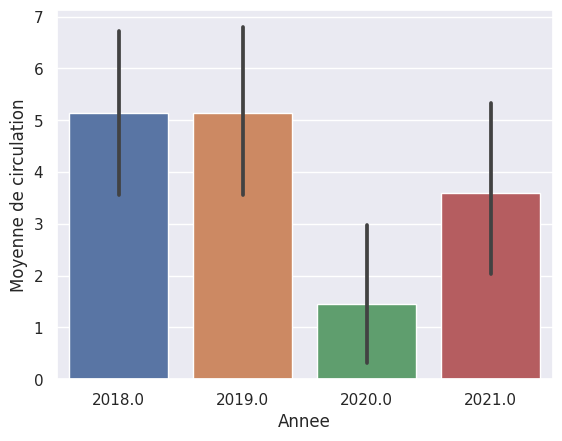

In [197]:
# df1.plot(kind='bar', x='Annee', y='Moyenne de circulation')
sns.set_theme()
sns.barplot(data= df1, x='Annee', y='Moyenne de circulation' ,  )


Entrer l'Annee 2019


<AxesSubplot: xlabel='Mois'>

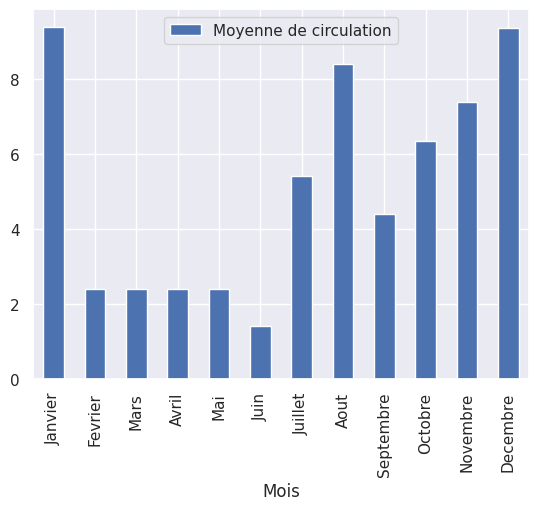

In [266]:
c=int(input("Entrer l'Annee"))
df1selectionne=df1[df1['Annee'] == c]
df1selectionne.plot(kind='bar', x='Mois', y='Moyenne de circulation', )

<AxesSubplot: xlabel='Mois'>

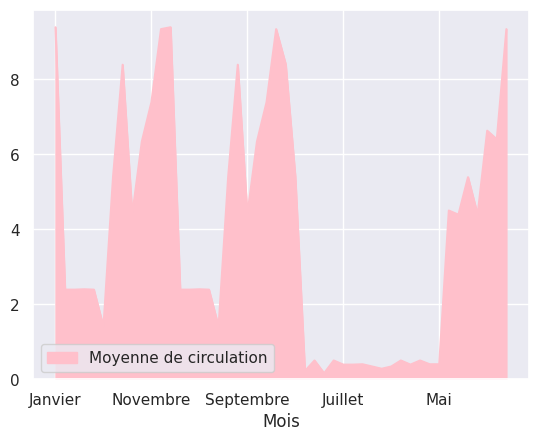

In [267]:
df1.plot(kind='area', x='Mois', y='Moyenne de circulation' , color="pink")

2 ) Création et visualisation du dataframe circulation global :

In [229]:
path  = 'hdfs://namenode:9000/ma_base/pollution/pollution_global.csv'
dataframe_pollution_global = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_pollution_global1 = dataframe_pollution_global.withColumnRenamed("Nombre_de_pollution_par_mois","Qualite d'air")
dataframe_pollution_global2 = dataframe_pollution_global1.select("Annee" , "Mois" , "Qualite d'air" , "Niveau pollution")
dataframe_pollution_global2.show()




+-----+---------+--------------------+----------------+
|Annee|     Mois|       Qualite d'air|Niveau pollution|
+-----+---------+--------------------+----------------+
| 2018|  Janvier|            degradee|               4|
| 2018|  Fevrier|             moyenne|               2|
| 2018|     Mars|             moyenne|               2|
| 2018|    Avril|               bonne|               1|
| 2018|      Mai|             moyenne|               2|
| 2018|     Juin|             moyenne|               2|
| 2018|  Juillet|            degradee|               4|
| 2018|     Aout|extremement mauvaise|               5|
| 2018|Septembre|            degradee|               4|
| 2018|  Octobre|            mauvaise|               3|
| 2018| Novembre|            mauvaise|               3|
| 2018| Decembre|extremement mauvaise|               5|
| 2019|  Janvier|extremement mauvaise|               5|
| 2019|  Fevrier|               bonne|               1|
| 2019|     Mars|             moyenne|          

In [201]:
import pandas as pd
dfp1=dataframe_pollution_global2.toPandas()
dfp1.dtypes


Annee               object
Mois                object
Qualite d'air       object
Niveau pollution    object
dtype: object

In [202]:
dfp1['Annee']=dfp1['Annee'].astype(float)
dfp1['Niveau pollution']=dfp1['Niveau pollution'].astype(float)
dfp1.dtypes

Annee               float64
Mois                 object
Qualite d'air        object
Niveau pollution    float64
dtype: object

<AxesSubplot: ylabel="Qualite d'air">

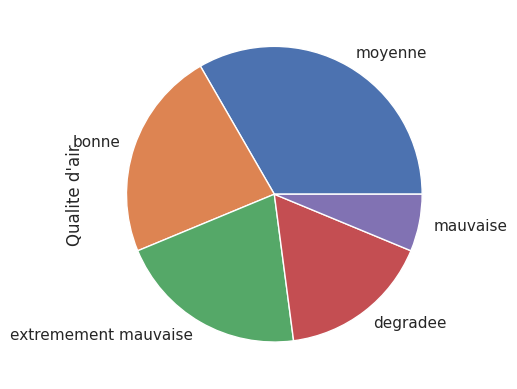

In [203]:
dfp1["Qualite d'air"].value_counts(normalize=True).plot(kind='pie')

<AxesSubplot: xlabel='Annee', ylabel='Niveau pollution'>

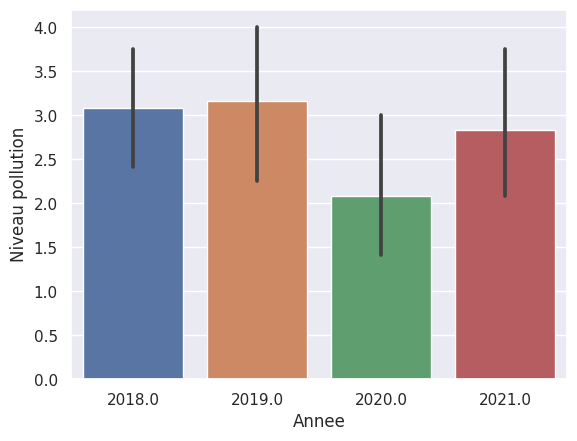

In [204]:
sns.set_theme()
sns.barplot(data= dfp1, x='Annee', y='Niveau pollution' ,  )


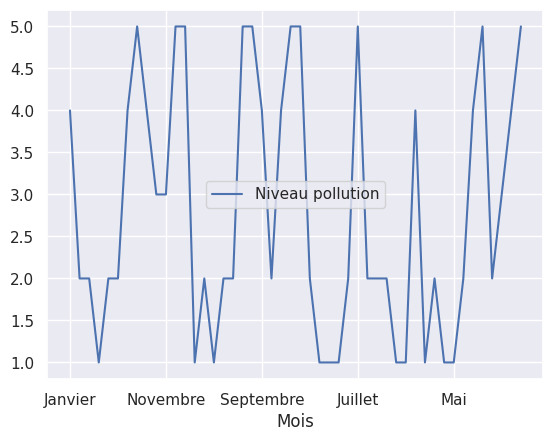

In [205]:
dfp1.plot.line(x="Mois" , y="Niveau pollution") ; plt.show()

Entrer l'Annee 2019


<AxesSubplot: xlabel='Mois'>

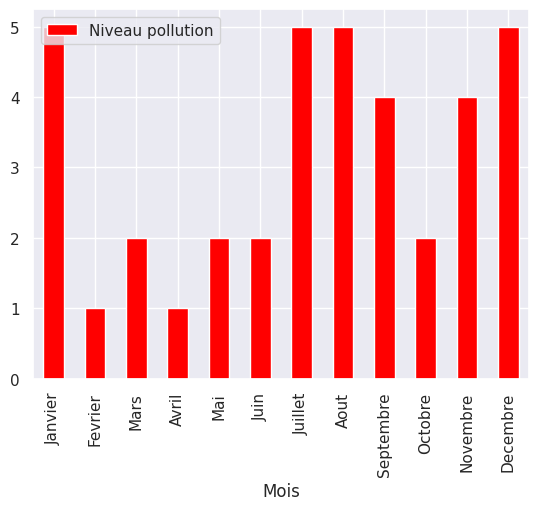

In [206]:
k=int(input("Entrer l'Annee"))
dfp1selectionne=dfp1[dfp1['Annee'] == k]
dfp1selectionne.plot(kind='bar', x='Mois', y='Niveau pollution', color='red')

3) Création et visualisation du dataframe accident global :

In [208]:
path  = 'hdfs://namenode:9000/ma_base/accident/lieux_global.csv'
dataframe_accident_global = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_accident_global1 = dataframe_accident_global.withColumnRenamed("Nombre_accident_par_mois","Nombre accident")
dataframe_accident_global1.show()

+-----+---------+---------------+
|Annee|     Mois|Nombre accident|
+-----+---------+---------------+
| 2018|  Janvier|           4803|
| 2018|  Fevrier|           4803|
| 2018|     Mars|           4759|
| 2018|    Avril|           4561|
| 2018|      Mai|           4594|
| 2018|     Juin|           4745|
| 2018|  Juillet|           4741|
| 2018|     Aout|           4726|
| 2018|Septembre|           4693|
| 2018|  Octobre|           4730|
| 2018| Novembre|           4672|
| 2018| Decembre|              0|
| 2019|  Janvier|           5719|
| 2019|  Fevrier|           2432|
| 2019|     Mars|           5306|
| 2019|    Avril|           5884|
| 2019|      Mai|           5541|
| 2019|     Juin|           2689|
| 2019|  Juillet|           5633|
| 2019|     Aout|           2847|
+-----+---------+---------------+
only showing top 20 rows



In [209]:
dfa1=dataframe_accident_global1.toPandas()
dfa1.dtypes


Annee              object
Mois               object
Nombre accident    object
dtype: object

In [210]:
dfa1['Annee']=dfa1['Annee'].astype(float)
dfa1['Nombre accident']=dfa1['Nombre accident'].astype(float)
dfa1['Mois']=dfa1['Mois'].astype(str)
#df1['Mois']=df1['Mois'].astype(float)
dfa1.dtypes

Annee              float64
Mois                object
Nombre accident    float64
dtype: object

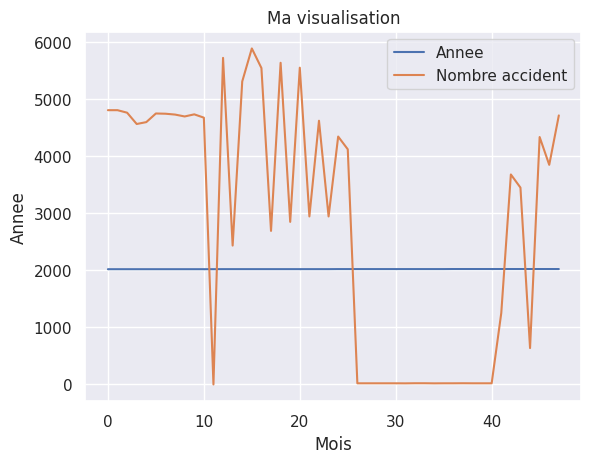

In [211]:
dfa1.plot()
plt.xlabel("Mois")
plt.ylabel("Annee")
plt.title("Ma visualisation")
plt.show()

Entrer l'Annee 2019


<AxesSubplot: xlabel='Mois'>

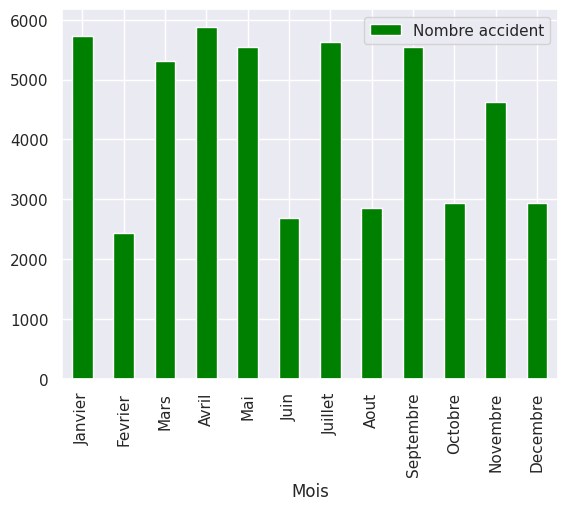

In [212]:
c=int(input("Entrer l'Annee"))
dfa1selectionne=dfa1[dfa1['Annee'] == c]
dfa1selectionne.plot(kind='bar', x='Mois', y='Nombre accident' , color='green')

In [213]:
!pip --version

pip 22.3.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)


In [214]:
!pip install numpy

In [215]:
!pip install matplotlib

In [216]:
!pip install seaborn

In [217]:
!pip install pandas

In [218]:
!pip install plot

4) Création et visualisation du dataframe  global :

In [219]:
path  = 'hdfs://namenode:9000/ma_base/global1/global1.csv'
dataframe_global = spark.read.format('csv').options(header=True, sep=";").load(path)
#dataframe_global1 = dataframe_accident_global.withColumnRenamed("Nombre_accident_par_mois","Nombre accident")
dataframe_global.show()

+-----+---------+-------------------------------+------------------------+----------------------------+----------------+
|Annee|     Mois|Moyenne de circulation par mois|Nombre_accident_par_mois|Nombre_de_pollution_par_mois|Niveau pollution|
+-----+---------+-------------------------------+------------------------+----------------------------+----------------+
| 2018|  Janvier|                           9.39|                    4803|                    degradee|               4|
| 2018|  Fevrier|                           2.39|                    4803|                     moyenne|               2|
| 2018|     Mars|                           2.39|                    4759|                     moyenne|               2|
| 2018|    Avril|                            2.4|                    4561|                       bonne|               1|
| 2018|      Mai|                           2.39|                    4594|                     moyenne|               2|
| 2018|     Juin|               

In [220]:
dfg1=dataframe_global.toPandas()
dfg1.dtypes


Annee                              object
Mois                               object
Moyenne de circulation par mois    object
Nombre_accident_par_mois           object
Nombre_de_pollution_par_mois       object
Niveau pollution                   object
dtype: object

In [221]:
dfg1['Moyenne de circulation par mois']=dfg1['Moyenne de circulation par mois'].astype(float)
dfg1['Mois']=dfg1['Mois'].astype(str)
dfg1['Niveau pollution']=dfg1['Niveau pollution'].astype(float)
dfg1.dtypes

Annee                               object
Mois                                object
Moyenne de circulation par mois    float64
Nombre_accident_par_mois            object
Nombre_de_pollution_par_mois        object
Niveau pollution                   float64
dtype: object

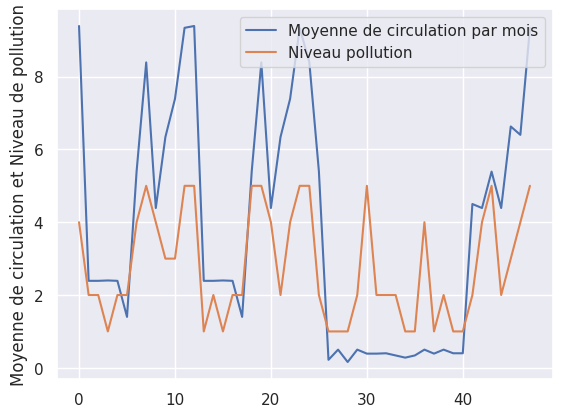

In [222]:

dfg1.plot() ; plt.ylabel("Moyenne de circulation et Niveau de pollution")
plt.show()


<AxesSubplot: xlabel='Niveau pollution', ylabel='Moyenne de circulation par mois'>

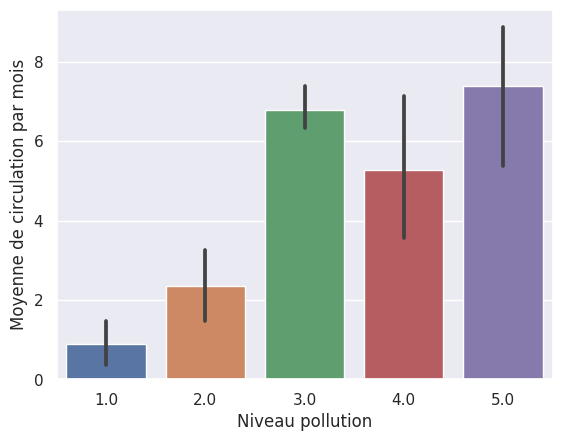

In [223]:
sns.set_theme()
sns.barplot(data= dfg1, x='Niveau pollution', y='Moyenne de circulation par mois',  )

In [224]:
path  = 'hdfs://namenode:9000/ma_base/global1/global1.csv'
dataframe_global_div = spark.read.format('csv').options(header=True, sep=";").load(path)
dataframe_global_div.show()
dataframe_global_div.dtypes

+-----+---------+-------------------------------+------------------------+----------------------------+----------------+
|Annee|     Mois|Moyenne de circulation par mois|Nombre_accident_par_mois|Nombre_de_pollution_par_mois|Niveau pollution|
+-----+---------+-------------------------------+------------------------+----------------------------+----------------+
| 2018|  Janvier|                           9.39|                    4803|                    degradee|               4|
| 2018|  Fevrier|                           2.39|                    4803|                     moyenne|               2|
| 2018|     Mars|                           2.39|                    4759|                     moyenne|               2|
| 2018|    Avril|                            2.4|                    4561|                       bonne|               1|
| 2018|      Mai|                           2.39|                    4594|                     moyenne|               2|
| 2018|     Juin|               

[('Annee', 'string'),
 ('Mois', 'string'),
 ('Moyenne de circulation par mois', 'string'),
 ('Nombre_accident_par_mois', 'string'),
 ('Nombre_de_pollution_par_mois', 'string'),
 ('Niveau pollution', 'string')]

In [225]:
dfg2=dataframe_global_div.toPandas()
dfg2.dtypes


Annee                              object
Mois                               object
Moyenne de circulation par mois    object
Nombre_accident_par_mois           object
Nombre_de_pollution_par_mois       object
Niveau pollution                   object
dtype: object

In [236]:
dfg2['Moyenne de circulation par mois']=dfg2['Moyenne de circulation par mois'].astype(float)
dfg2.dtypes


Annee                               object
Mois                                object
Moyenne de circulation par mois    float64
Nombre_accident_par_mois            object
Nombre_de_pollution_par_mois        object
Niveau pollution                    object
dtype: object

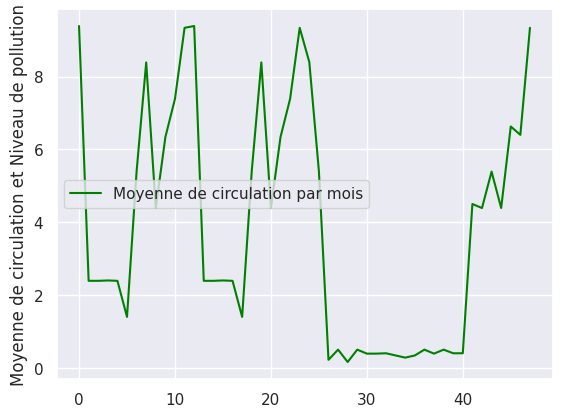

In [237]:
dfg2.plot(color="green") ; plt.ylabel("Moyenne de circulation et Niveau de pollution")
plt.show()

In [246]:
dfg2['Nombre_accident_par_mois']=dfg2['Nombre_accident_par_mois'].astype(float)


In [268]:

dfg3 = dfg2['Nombre_accident_par_mois']/1000
dfg3.head(2)
#dfg4 = (dfg2['Moyenne de circulation par mois'] , dfg3)


0    4.803
1    4.803
Name: Nombre_accident_par_mois, dtype: float64

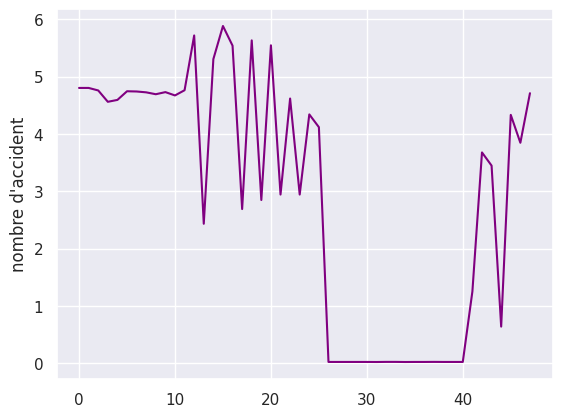

In [242]:

dfg3.plot(color="purple") ; plt.ylabel("nombre d'accident")
plt.show()


INTEGRATION DES DONNEES AVEC MONGODB

In [1]:
#le module python PyMongo pour connecter le notebook Jupyter à l'hôte local MongoDB.

!pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.1/492.1 kB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 3.3 MB/s eta 0:00:0000:0100:01


In [9]:
#importez le module PyMongo 

import pymongo 
from pymongo import MongoClient

In [12]:
#connectez la base de données MongoDB à l'aide de la ligne de code

Client= MongoClient("localhost",27017)

In [16]:
#Ici, nous récupérons la collection data

db=Client["data"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'data')